<a href="https://colab.research.google.com/github/raviintechis/Student_Performance_Analysis/blob/main/Student_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# for some basic operations
import numpy as np
import pandas as pd

In [2]:
!pip install dabl

     |████████████████████████████████| 558 kB 5.1 MB/s 


In [3]:
# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import dabl

/usr/local/lib/python3.7/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning:

Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.



In [10]:
passmark = 40

In [6]:
data = pd.read_csv('StudentsPerformance.csv')

# getting the shape of the data
print(data.shape)

(1000, 8)


In [7]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


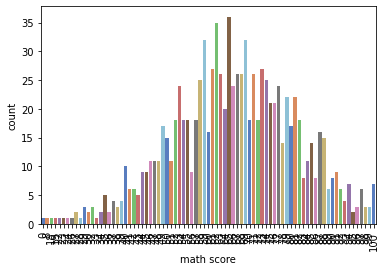

In [11]:
p = sns.countplot(x="math score", data = data, palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=90) 

##How many students passed in Math exam ?

In [12]:
data['Math_PassStatus'] = np.where(data['math score']<passmark, 'F', 'P')
data.Math_PassStatus.value_counts()

P    960
F     40
Name: Math_PassStatus, dtype: int64

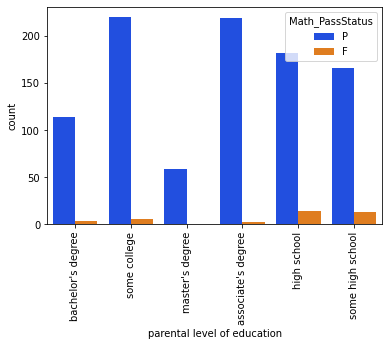

In [13]:
p = sns.countplot(x='parental level of education', data = data, hue='Math_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

##Let us explore the Reading score¶


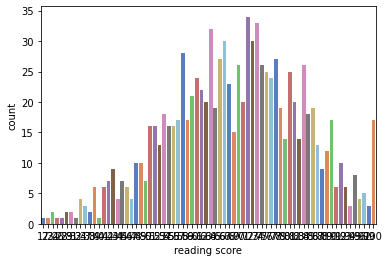

In [14]:
sns.countplot(x="reading score", data = data, palette="muted")
plt.show()

##How many studends passed in reading?

In [15]:
data['Reading_PassStatus'] = np.where(data['reading score']<passmark, 'F', 'P')
data.Reading_PassStatus.value_counts()

P    974
F     26
Name: Reading_PassStatus, dtype: int64

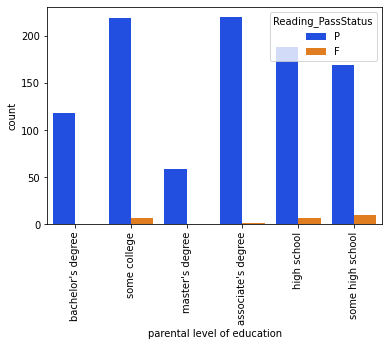

In [16]:
p = sns.countplot(x='parental level of education', data = data, hue='Reading_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

##Let us explore writing score¶


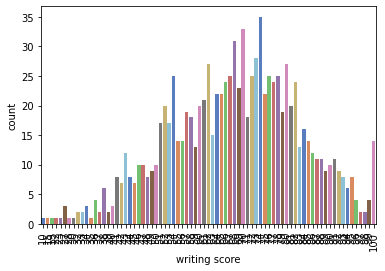

In [17]:
p = sns.countplot(x="writing score", data = data, palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=90) 

##How many students passed writing ?

In [18]:
data['Writing_PassStatus'] = np.where(data['writing score']<passmark, 'F', 'P')
data.Writing_PassStatus.value_counts()

P    968
F     32
Name: Writing_PassStatus, dtype: int64

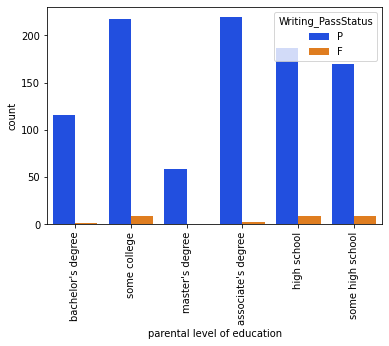

In [19]:
p = sns.countplot(x='parental level of education', data = data, hue='Writing_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90)

##Iet us check "How many students passed in all the subjects ?"

In [20]:
data['OverAll_PassStatus'] = data.apply(lambda x : 'F' if x['Math_PassStatus'] == 'F' or 
                                    x['Reading_PassStatus'] == 'F' or x['Writing_PassStatus'] == 'F' else 'P', axis =1)

data.OverAll_PassStatus.value_counts()

P    949
F     51
Name: OverAll_PassStatus, dtype: int64

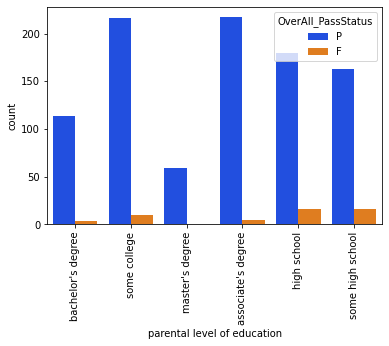

In [21]:
p = sns.countplot(x='parental level of education', data = data, hue='OverAll_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90)

##Find the percentage of marks


In [22]:
data['Total_Marks'] = data['math score']+data['reading score']+data['writing score']
data['Percentage'] = data['Total_Marks']/3

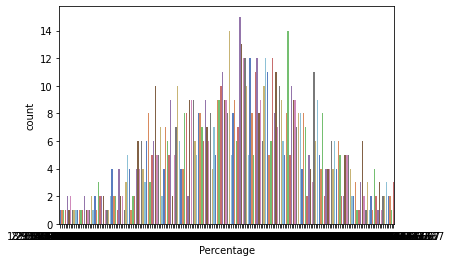

In [23]:
p = sns.countplot(x="Percentage", data = data, palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=0) 

##Let us assign the grades

#above 80 = A Grade
#70 to 80 = B Grade
#60 to 70 = C Grade¶
#50 to 60 = D Grade
#40 to 50 = E Grade
#below 40 = F Grade ( means Fail )

In [25]:
def GetGrade(Percentage, OverAll_PassStatus):
    if ( OverAll_PassStatus == 'F'):
        return 'F'    
    if ( Percentage >= 80 ):
        return 'A'
    if ( Percentage >= 70):
        return 'B'
    if ( Percentage >= 60):
        return 'C'
    if ( Percentage >= 50):
        return 'D'
    if ( Percentage >= 40):
        return 'E'
    else: 
        return 'F'

data['Grade'] = data.apply(lambda x : GetGrade(x['Percentage'], x['OverAll_PassStatus']), axis=1)

data.Grade.value_counts()

B    261
C    256
A    198
D    178
E     56
F     51
Name: Grade, dtype: int64

##we will plot the grades obtained in a order

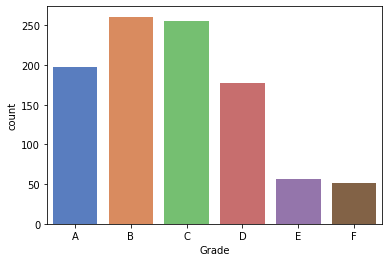

In [27]:
sns.countplot(x="Grade", data = data, order=['A','B','C','D','E','F'],  palette="muted")
plt.show()

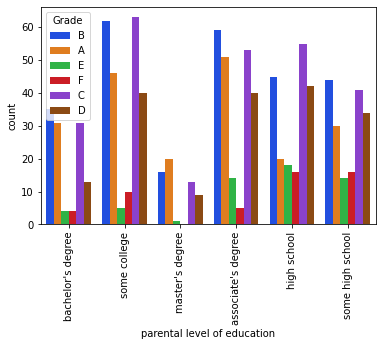

In [28]:
p = sns.countplot(x='parental level of education', data = data, hue='Grade', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 